## Score: 104

## Comment: 

<font color=Red>
Q1.[11] Good job!
<br><br>
Q2.[11] Good job!
<br><br>
Q3.[16] Good job!
<br><br>
Q4.[5+15+6] Correct （4.2很好的写出了这道题目，但Sum_averages的数学推导我有些看不懂，nevermind）
<br><br>
Q5.[5+25+5] Correct 时间复杂度较高
</font>


In [2]:
from typing import Union

# Assignment 01

## 1. Flowchart

[10 points] Write a function Print_values with arguments a, b, and c to reflect the following flowchart. Here the purple parallelogram operator on a list [x, y, z] is to compute and print x+y-10z. Try your output with some random a, b, and c values. Report your output when a = 5, b = 15, c = 10.

![](https://zhu-group.github.io/ese5023/figs/flowchart_a1.png)

In [325]:
def Print_value(a, b, c) -> list:
    """
    完全遵照流程图进行大小判断
    """
    if a > b:
        if b > c:
            result = [a, b, c] # a > b > c
        else:
            if a > c:
                result = [a, c, b] # a > c > b
            else:
                result = [c, a, b] # c > a > b
    else:
        if b > c:
            return
            # if a > c:
            #     result = [b, a, c] # b > a > c
            # else:
            #     result = [b, c, a] # b > c > a
        else:
            result = [c, b, a] # c > b > a
    return result

def Print_value(a, b, c) -> list:
    """
    使用链式比较，稍微简化一下
    """
    if a > b > c:
        result = [a, b, c]
    elif a > c > b:
        result = [a, c, b]
    elif b > a > c:
        # result = [b, a, c]
        return
    elif b > c > a:
        # result = [b, c, a]
        return
    elif c > a > b:
        result = [c, a, b]
    elif c > b > a:
        result = [c, b, a]
    return result

def Print_value(a, b, c) -> list:
    """
    参照程序目标，使用列表的排序方法简化
    """
    values = [a, b, c]
    if ((a < b) & (b > c)): return
    values.sort(reverse=True)
    return values

Print_value(a=5, b=15, c=10)

## 2. Continuous celing function

[10 points] Given a list with N positive integers. For every element x of the list, find the value of continuous ceiling function defined as F(x) = F(ceil(x/3)) + 2x, where F(1) = 1.

In [238]:
from math import ceil
from random import random

def F(x: float) -> float:
    """
    递归计算，使用条件表达式简化书写
    """
    result = F(ceil(x/3)) + 2*x if x != 1 else 1
    return result

random_list = [random()*10 for x in range(5)]
print(random_list)
result_list = [F(x) for x in random_list]
print(result_list)

[2.627896070509459, 3.8041415697813905, 5.076011927801577, 1.2374907762253684, 6.604136045992739]
[6.255792141018918, 12.608283139562781, 15.152023855603154, 3.474981552450737, 20.208272091985478]


## 3. Dice rolling

3.1 [15 points] Given 10 dice each with 6 faces, numbered from 1 to 6. Write a function Find_number_of_ways to find the number of ways to get sum x, defined as the sum of values on each face when all the dice are thrown.

3.2 [5 points] Count the number of ways for any x from 10 to 60, assign the number of ways to a list called Number_of_ways, so which x yields the maximum of Number_of_ways?

In [241]:
# 3.1
def Find_number_of_ways(x: int, n_dice: int = 10) -> int:
    """
    获取在给定骰子个数下，可以得到给定目标骰子面值和的途径数
    # Parameters:
        x       目标骰子面值和
        n_dice  骰子个数
    # Returns:
        n_way   n_dice 个骰子总面值 x 点的途径数
    # Notes:
        这里计算的是排列数而非组合数，也即 (骰子 1 投出 1, 骰子 2 投出 2) 与 (骰子 1 投出 2, 骰子 2 投出 1) 是两种不同的途径
    """
    x_min, x_max = n_dice*1, n_dice*6 # 计算给定骰子可以投出的面值范围
    n_way = 0 # 初始化途径数
    if (x_min <= x <= x_max): # 如果在有效范围内，则继续计算，否则途径数为 0
        if n_dice > 1: # 有一个以上的骰子，递归计算第一个骰子的六种面值下的途径数总和
            for i in range(1, 6+1):
                x_new, n_dice_new = x - i, n_dice - 1
                n_way += Find_number_of_ways(x_new, n_dice_new)
        else:
            n_way = 1 # 只有一个骰子，那就仅有一种途径
    return n_way

# 3.2
x_list = list(range(10, 60+1))
Number_of_ways = [Find_number_of_ways(x) for x in x_list]
print(Number_of_ways)
print(f"x is {x_list[Number_of_ways.index(max(Number_of_ways))]}") # 获取最大值，然后取索引，打印相应位置的 x 值

[1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
x is 35


## 4. Dynamic programming

4.1 [5 points] Write a function Random_integer to fill an array of N elements by randomly selecting integers from 0 to 10.

4.2 [15 points] Write a function Sum_averages to compute the sum of the average of all subsets of the array. For example, given an array of [1, 2, 3], you Sum_averages function should compute the sum of: average of [1], average of [2], average of [3], average of [1, 2], average of [1, 3], average of [2, 3], and average of [1, 2, 3].

4.3 [5 points] Call Sum_averages with N increasing from 1 to 100, assign the output to a list called Total_sum_averages. Plot Total_sum_averages, describe what do you see.

可以合理假设在 N 较大时取值均匀，也即取平均值 5，则最终结果总和为 5*组合数，也即：

$$
5\times \sum_{i=1}^{N}\frac{N!}{i!(N-i)!}
$$

Update: 想了一下，每个值在所有组合|中出现的概率应该是相等的，也就是应该可以不直接算每种组合，也就是可以表示为:

$$
\sum_{i=1}^N\left(\frac{1}{i}\times\frac{N!}{i!(N-i)!}\times\frac{i}{N}\right)\sum_{j=1}^{N}{x_j}
=\sum_{i=1}^N\left(\frac{(N-1)!}{i!(N-i)!}\right)\sum_{j=1}^{N}{x_j}
$$

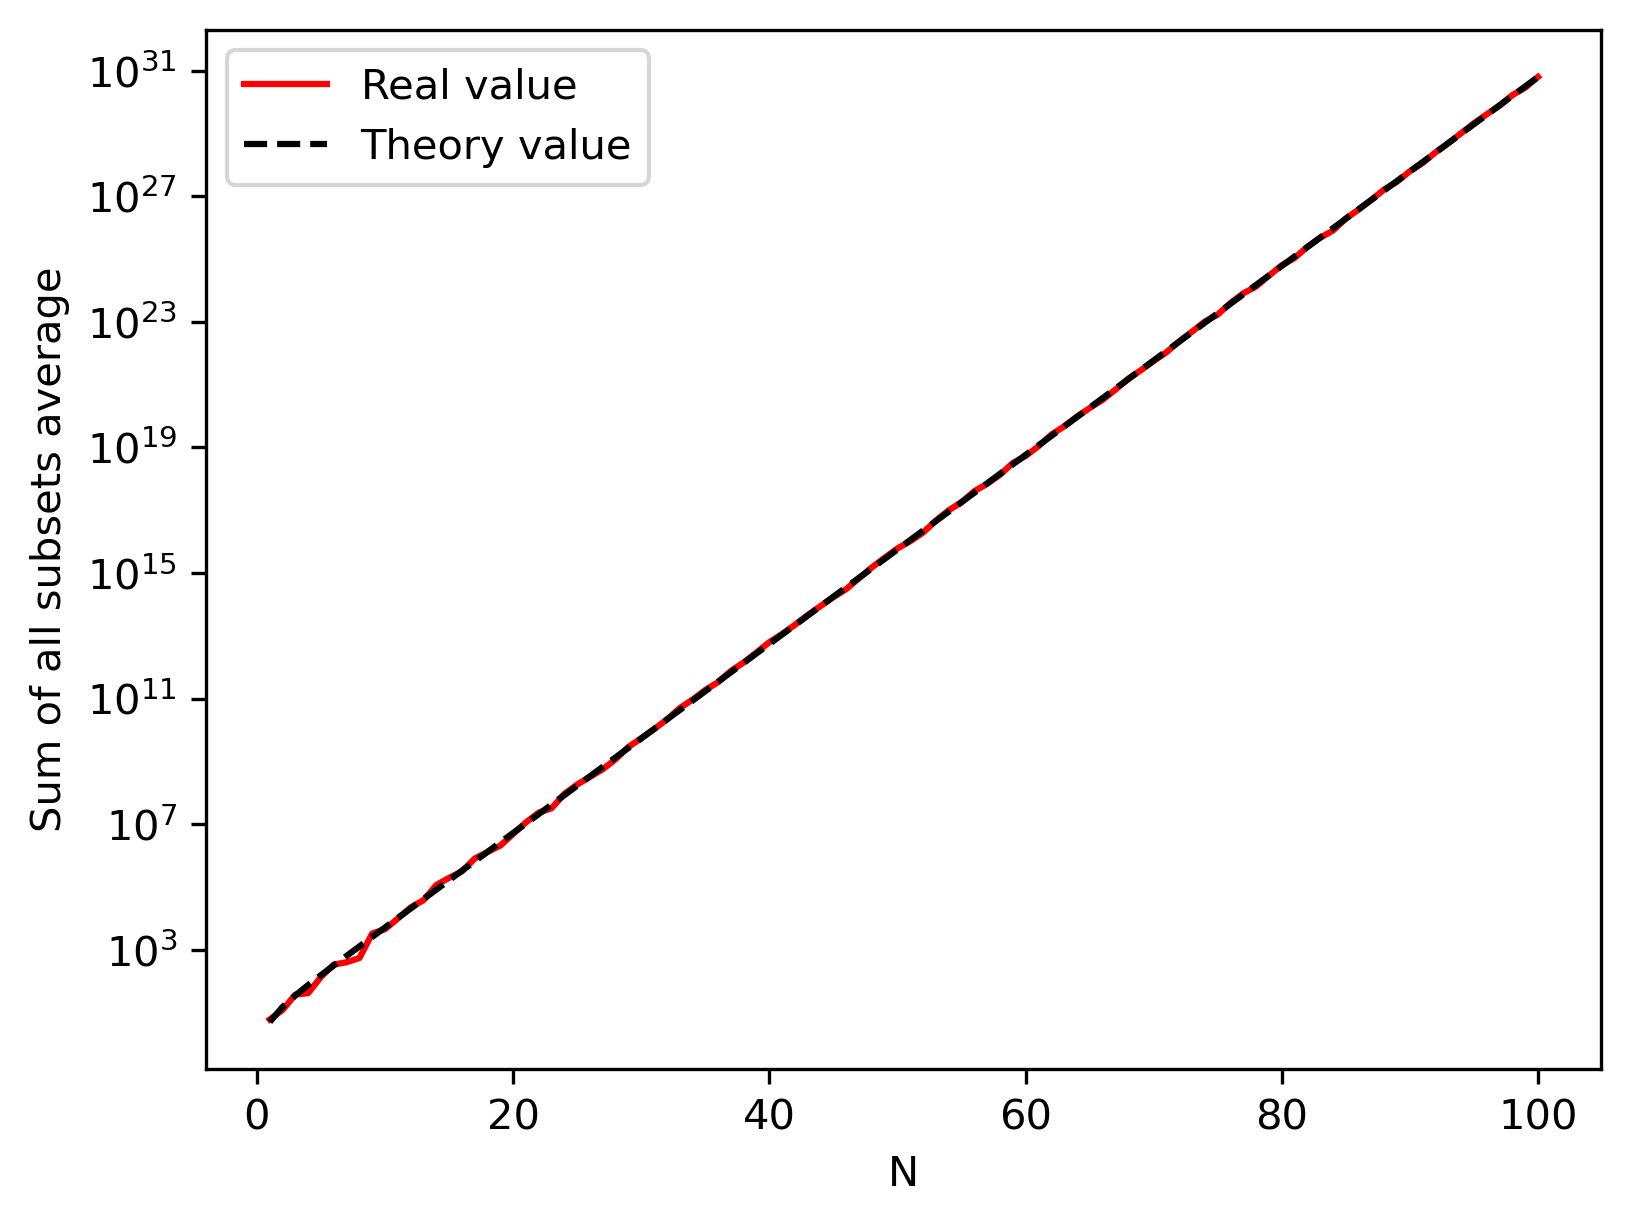

In [327]:
from random import random
from math import floor, factorial
from itertools import combinations
import matplotlib.pyplot as plt

# 4.1
def Random_integer(N: int) -> list:
    """
    取长度为 N、数值大小从 0 到 10 的随机数组，使用列表推导式简化书写
    """
    result = [floor(random()*11) for x in range(N)]
    return result

# Random_integer(10)

# 4.2
def Sum_averages_old(array: list) -> float:
    """
    计算数组 array 所有子集的平均和
    
    使用 itertools 库的 combinations 方法，其可以给出给定数组所有给定长度组合的可迭代对象
    """
    n = len(array)
    result = 0
    for i in range(1, n+1): # 所有子集可能长度进行迭代
        for subset in combinations(array, i): # 计算每一个长度 i 的子集的均值，并累加
            result += sum(subset)/i
    return result

def Sum_averages(array: list) -> float:
    n = len(array)
    result = sum([factorial(n-1)/(factorial(i)*factorial(n-i)) for i in range(1,n+1)])*sum(array)
    return result

# Sum_averages(Random_integer(10))

# 4.3 考虑到计算效率，仅计算了 N 最大到 25 的结果（划掉，简化计算后可以计算到 100）
N_max = 100
random_list = [Random_integer(N) for N in range(1, N_max+1)]
# Total_sum_averages_old = [Sum_averages_old(x) for x in random_list] # 实际值
Total_sum_averages = [Sum_averages(x) for x in random_list]
Total_sum_averages_prodict = [5*sum([factorial(N)/(factorial(M)*factorial(N-M)) for M in range(1, N+1)]) for N in range(1, N_max+1)] # 理论值

fig = plt.figure(figsize=[6, 4.5], dpi=300)
ax = fig.add_subplot()
x = range(1, N_max+1)
ax.plot(x, Total_sum_averages, "r", label="Real value")
# ax.plot(x, Total_sum_averages_old, "b", label="Real value (old)")
ax.plot(x, Total_sum_averages_prodict, "k--", label="Theory value")
ax.set_xlabel("N")
ax.set_ylabel("Sum of all subsets average")
# ax.set_ylim([1e-1, ax.get_ylim()[1]*10])
ax.set_yscale("log")
ax.legend()
fig.savefig("images/PS1_4_figure1.jpg", transparent=True, bbox_inches='tight')

## 5. Path counting

5.1 [5 points] Create a matrix with N rows and M columns, fill the right-bottom corner and top-left corner cells with 1, and randomly fill the rest of matrix with integer 0 or 1.

5.2 [25 points] Consider a cell marked with 0 as a blockage or dead-end, and a cell marked with 1 is good to go. Write a function Count_path to count total number of paths to reach the right-bottom corner cell from the top-left corner cell.

Notice: for a given cell, you are only allowed to move either rightward or downward.

5.3 [5 points] Let N = 10, M = 8, run Count_path for 1000 times, each time the matrix (except the right-bottom corner and top-left corner cells, which remain being 1) is re-filled with integer 0 or 1 randomly, report the mean of total number of paths from the 1000 runs.

抽象一下，相当于有一个长度为 M + N - 2 的数组，其中有 M - 1 次向右、N - 1 次向下，遍历其所有坐标，如果轨迹上存在 0，则路径无效，否则有效

In [3]:
# from random import random
import numpy as np
from itertools import combinations

def Count_path(M: int, N: int, threshold: float = 0.3) -> Union[np.ndarray, int]:
    """
    计算一个网格在有障碍物的情况下，从左上到右下位置可能的途径数
    # Parameters:
        M           网格的宽度
        N           网格的长度
        threshold   一个阈值，有效范围 0 到 1，越接近 0 则障碍物越少，越接近 1 则障碍物越多
    # Returns:
        matrix      抽到的数组
        n_count     途径个数
    # Notes:
        考虑到计算效率，使用 numpy 数组而非列表，虽然要迭代所有可能路径，不过应该还是比设置一个点，然后移动（用 Python 算）要快（应该，吧？除非障碍物非常多，例如阈值 0.5 的时候就基本为 0 了）
    """
    length = M + N - 2
    n_count = 0
    # matrix = [[round(random()) for x in range(N)] for y in range(M)]
    matrix = np.random.random([N, M]) > threshold # 生成网格
    matrix[[0, -1], [0, -1]] = 1 # 强制起点终点为 1
    for t_right in combinations(range(length), M - 1): # 从 M + N - 2 个时间步中抽 M - 1 个向右
        dxs, dys = np.zeros([length], dtype="i4"), np.zeros([length], dtype="i4") # 初始化数组
        dxs[list(t_right)] = 1 # 向右的时间步
        dys = 1 - dxs # 向下的时间步
        xs = np.cumsum(dxs) # 每个时间步的 X 轴坐标
        ys = np.cumsum(dys) # 每个时间步的 Y 轴坐标
        if all(matrix[ys, xs]): # 如果所有坐标都没有障碍物（均为 1），则可能路径加一
            n_count += 1
    return matrix, n_count

matrix, n_count = Count_path(8, 10)
result = np.mean([Count_path(8, 10)[1] for x in range(1000)])
print(f"在 10 行 8 列，30 % 网格存在障碍物的情况下，1000 次运行平均可能路径数为 {result}")
# plt.imshow(matrix, cmap="gray")
# print(n_count)

在 10 行 8 列，30 % 网格存在障碍物的情况下，1000 次运行平均可能路径数为 51.536
